In [1]:
import os
os.chdir('..')

In [74]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns

import json

import numpy as np

sns.set(font_scale=1.5)

results_folder = './server/cost_hessian_old/results/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [55]:
models = ['MNL', 'Nested', 'LPMC_DrivingCost', 'LPMC_RemoveRest', 'LPMC_Full']

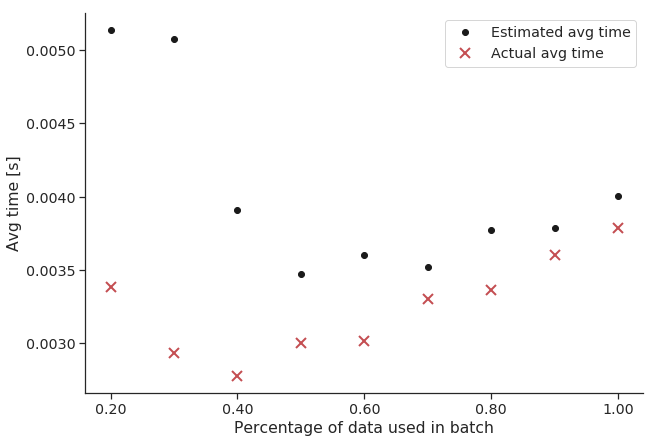

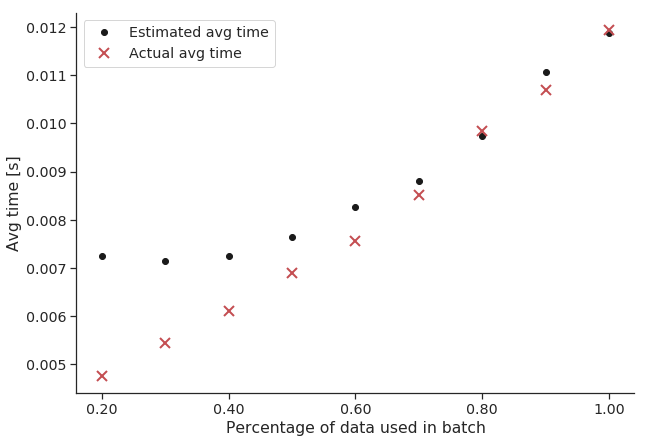

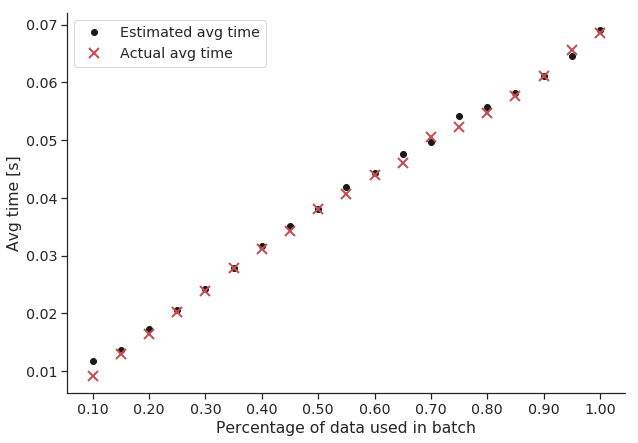

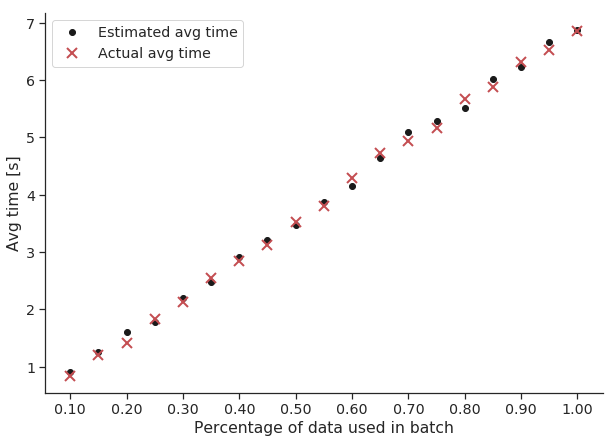

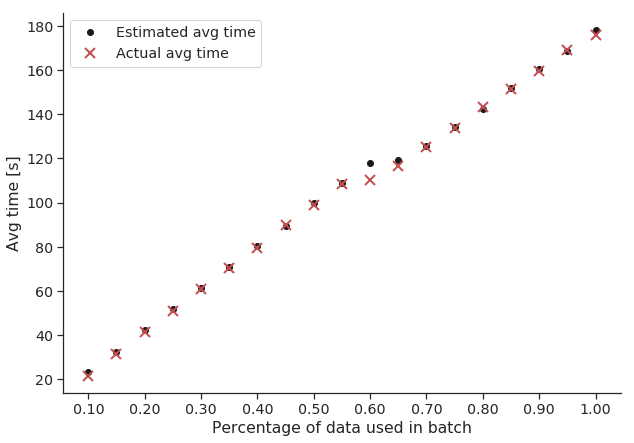

In [58]:
for model in models:

    with open(results_folder + model + '.json', 'r') as infile:
        data = json.load(infile)

    sizes = data['size']
    times = data['time']

    avg = [np.mean(time) for time in times]
    
    percs = np.array(sizes)/sizes[-1]
    
    next_time = []

    for i in range(len(avg[:-1])):
        val = avg[i]/percs[i]*percs[i+1]

        next_time.append(val)
        
        
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.3)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
        "font.scale": 2
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.plot(sizes[1:], next_time, 'ko', label = 'Estimated avg time')

    plt.plot(sizes[1:], avg[1:], 'rx', markersize=10, markeredgewidth=2, label = 'Actual avg time')

    strs = ['{:.2f}'.format(val) for val in percs[1::2]]

    plt.xticks(sizes[1::2], strs)

    plt.ylabel('Avg time [s]')
    plt.xlabel('Percentage of data used in batch')
    plt.legend()

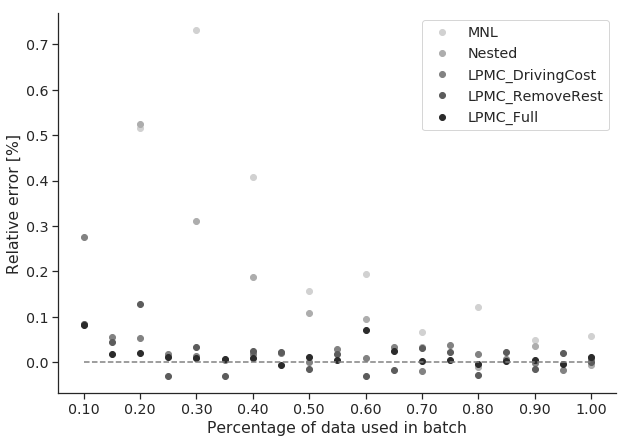

In [84]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

cm = plt.get_cmap('Greys') 
c_norm  = colors.Normalize(vmin=-2, vmax=len(models))
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cm)

for i, model in enumerate(models):

    with open(results_folder + model + '.json', 'r') as infile:
        data = json.load(infile)

    sizes = data['size']
    times = data['time']

    avg = [np.mean(time) for time in times]
    
    percs = np.array(sizes)/sizes[-1]
    
    next_time = []

    for j in range(len(avg[:-1])):
        val = avg[j]/percs[j]*percs[j+1]

        next_time.append(val)
        
    delta = (np.array(next_time)-np.array(avg[1:]))/np.array(avg[1:])
    
    color_val = scalar_map.to_rgba(i)

    plt.plot(percs[1:], delta, 'o', color=color_val, label=model)
    
plt.plot([0.1, 1], [0, 0], '--', color='gray')

strs = ['{:.2f}'.format(val) for val in percs[1::2]]

plt.xticks(percs[1::2], strs)

plt.ylabel('Relative error [%]')
plt.xlabel('Percentage of data used in batch')
plt.legend()